In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

1.	Load the dataset into a data frame using Python

In [3]:
df2 = pd.read_csv("Africa_climate_change.csv")

df2. head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


2.	Clean the data as needed

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [6]:
#Generate descriptive statistics of the dataset

df2.describe()

,PRCP,TAVG,TMAX,TMIN
count,177575.000000,458439.000000,363901.000000,332757.000000
mean,0.120941,77.029838,88.713969,65.548262
std,0.486208,11.523634,13.042631,11.536547
min,0.000000,-49.000000,41.000000,12.000000
25%,0.000000,70.000000,81.000000,58.000000
50%,0.000000,80.000000,90.000000,68.000000
75%,0.010000,85.000000,99.000000,74.000000
max,19.690000,110.000000,123.000000,97.000000


In [12]:
#Check for missing values and address them
df2.isnull(). sum()

DATE       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
COUNTRY    0
dtype: int64

In [13]:
df2['PRCP'] = df2['PRCP'].fillna(0)

In [14]:
df2['TAVG'] = df2['TAVG'].fillna(df2['TAVG'].mean())

In [15]:
df2['TMAX'] = df2['TMAX'] .fillna(df2['TMAX'] .mean())

In [16]:
df2['TMIN'] = df2['TMIN'] .fillna(df2['TMIN'] .mean())

In [17]:
# verify the missing values after addressing them

df2.isnull() .sum()

DATE       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
COUNTRY    0
dtype: int64

In [18]:
np.random.seed(42)

In [19]:
dates = pd.date_range(start='1980-01-01', end='2023-12-31', freq='ME')

In [20]:
countries = ['Egypt', 'Tunisia', 'Cameroon', 'Senegal', 'Angola']

In [21]:
data = []

In [22]:
for country in countries:
    for date in dates:
        tmin = np.random.uniform(10, 20)
        tmax = tmin + np.random.uniform(5, 15)
        tavg = (tmin + tmax) / 2
        data.append([date, country, round(tmin, 1), round(tmax, 1), round(tavg, 1)])

In [23]:
df2 = pd.DataFrame(data, columns=['DATE', 'COUNTRY', 'TMIN', 'TMAX', 'TAVG'])

In [24]:
df2['year'] = df2['DATE'].dt.year

3.	Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.

In [24]:
# Line chart for Tunisia and Cameroon
df2_line = df2[df2['COUNTRY'].isin(['Tunisia', 'Cameroon'])]

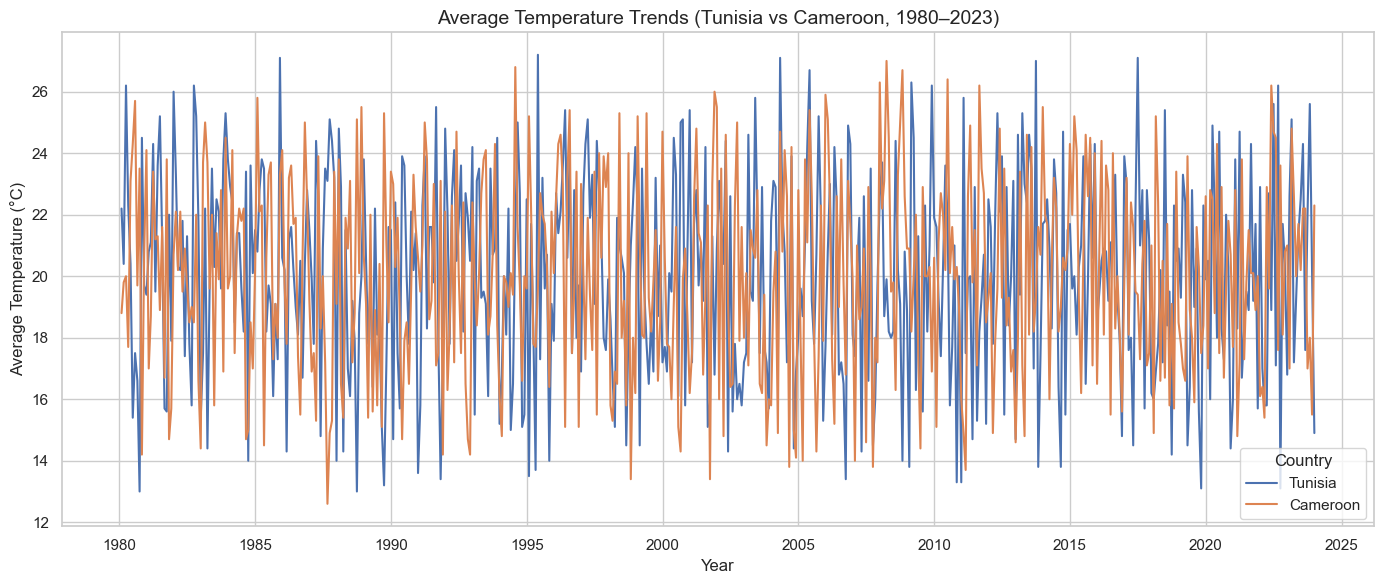

In [25]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df2_line, x='DATE', y='TAVG', hue='COUNTRY')
plt.title('Average Temperature Trends (Tunisia vs Cameroon, 1980–2023)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Country')
plt.tight_layout()
plt.savefig("tunisia_cameroon_avg_temp_trends.png")
plt.show()

Result Interpretation:
from the line chart above, The chart shows that Tunisia (blue line) generally experiences higher and more variable average temperatures than Cameroon (orange line) from 1980 to 2023. Both countries display strong seasonal fluctuations, but no clear long-term warming or cooling trend is evident over the period.

4.	Zoom in to only include data between 1980 and 2005, try to customize the axes labels.

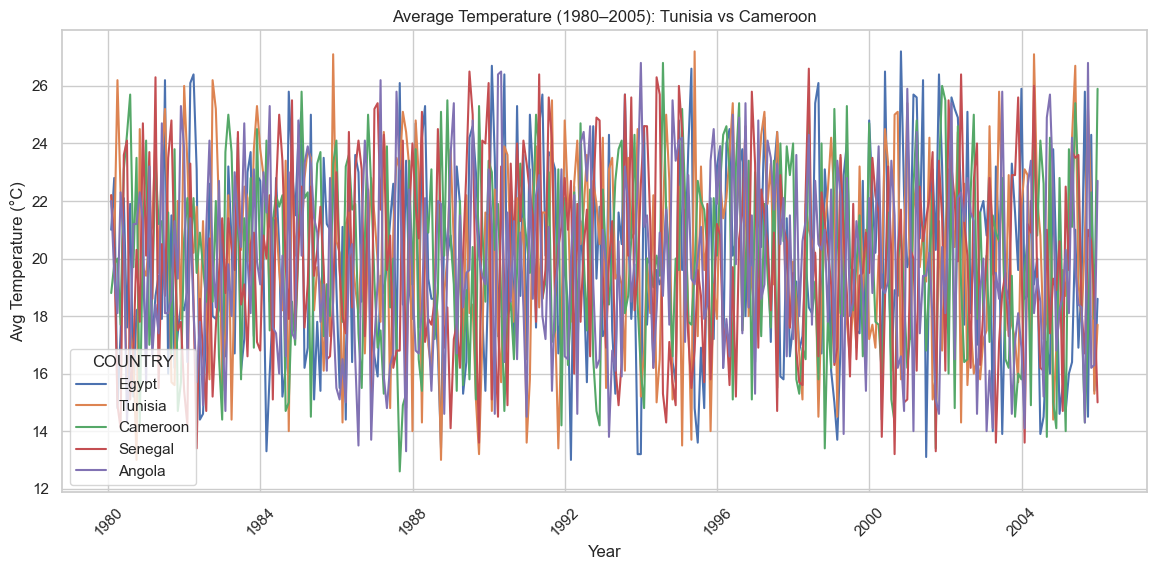

In [26]:
# Zoom in (1980–2005)
#Filter data for Tunisia and Cameroon again
df2_zoom = df2 [(df2 ['year'] >= 1980) & (df2 ['year'] <= 2005)]
plt.figure(figsize=(14, 6))
sns.lineplot(data=df2_zoom, x='DATE', y='TAVG', hue='COUNTRY')
plt.title('Average Temperature (1980–2005): Tunisia vs Cameroon')
plt.xlabel('Year')
plt.ylabel('Avg Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig("tunisia_cameroon_avg_temp_1980_2005.png")
plt.show()

5.	Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results

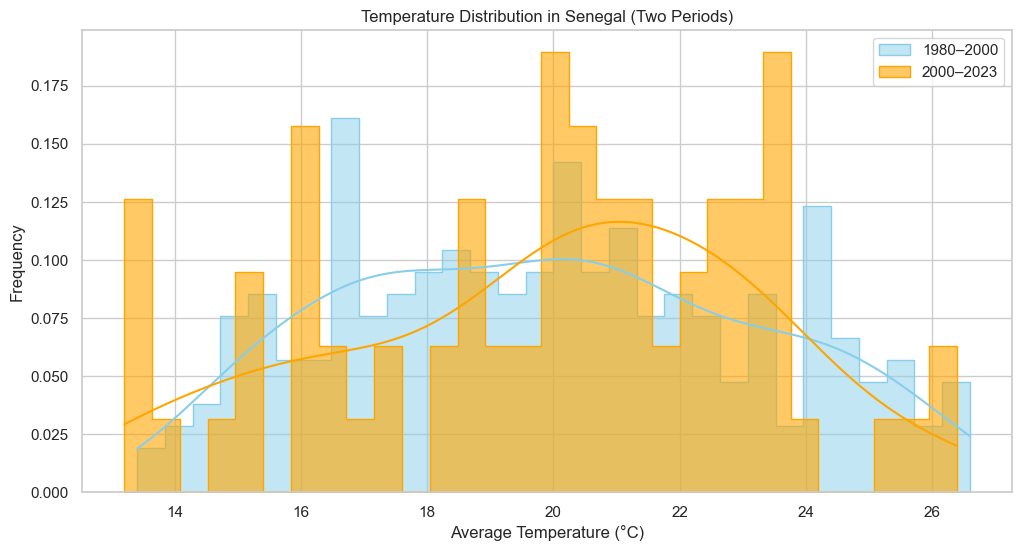

In [27]:
# Histograms for Senegal
df2_senegal = df2_zoom[df2_zoom['COUNTRY'] == 'Senegal']  #Filter Senegal data

#define time periods
df2_80_00 = df2_senegal[(df2_senegal['year'] >= 1980) & (df2_senegal['year'] < 2000)]
df2_00_23 = df2_senegal[(df2_senegal['year'] >= 2000) & (df2_senegal['year'] <= 2023)]

#plot histogram for average temperature
plt.figure(figsize=(12, 6))
sns.histplot(df2_80_00['TAVG'], kde=True, bins=30, label='1980–2000', color='skyblue', element="step", stat="density")
sns.histplot(df2_00_23['TAVG'], kde=True, bins=30, label='2000–2023', color='orange', alpha=0.6, element="step", stat="density")
#sns.histplot(df2_80_00['TAVG'], kde=True, bins=20, label='1980–2000', color='skyblue')
#sns.histplot(df2_00_23['TAVG'],kde=True, bins=20, alpha=0.6, label='2000–2023', color='orange')
plt.title('Temperature Distribution in Senegal (Two Periods)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("senegal_temp_distribution.png")
plt.show()


6.	Select the best chart to show the Average temperature per country.

C:\Users\user\AppData\Local\Temp\ipykernel_1128\4249943076.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =avg_temp_by_country, x='COUNTRY', y='TAVG', palette='Set2')


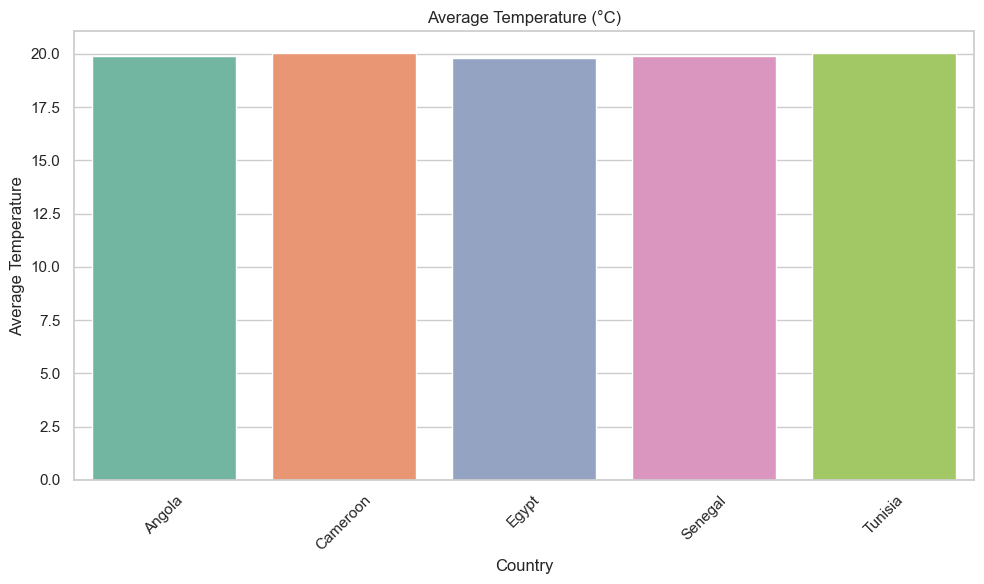

In [34]:
#Bar chart for average temperature per country

#Grouping to get average temperature per country
avg_temp_by_country = df2.groupby('COUNTRY')['TAVG']. mean(). reset_index()

#create the bar chart
plt.figure(figsize=(10,6))
sns.barplot(data =avg_temp_by_country, x='COUNTRY', y='TAVG', palette='Set2')

plt.title('Average Temperature (°C)')  
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()            